In [83]:
!pip install pandas

     |████████████████████████████████| 12.2 MB 5.6 MB/s eta 0:00:01
     |████████████████████████████████| 17.3 MB 325 kB/s eta 0:00:01
     |████████████████████████████████| 499 kB 3.6 MB/s eta 0:00:01


In [6]:
import imdb
import pandas as pd
import json
import matplotlib.pyplot as plt

In [7]:
ia = imdb.Cinemagoer()

Can you download the top250 data with specific datafields?

# Get Top 100 Movies by Company
1. Get Top100 list of 2022
2. Get movies by companies!
3. Make visualization based on compay: Top100, with two colored scheme to show which company did which!

- Highest Grossing movies
- Top100 Netflix movies
- Top100 Disneymovies


In [13]:
ia.get_movie_list(list_="ls516170906")

[<Movie id:14557188[http] title:_Soft & Quiet (2022)_>,
 <Movie id:1016150[http] title:_All Quiet on the Western Front (2022)_>,
 <Movie id:1877830[http] title:_The Batman (2022)_>,
 <Movie id:4960748[http] title:_Till (2022)_>,
 <Movie id:6710474[http] title:_Everything Everywhere All at Once (2022)_>,
 <Movie id:15791034[http] title:_Barbarian (2022)_>,
 <Movie id:10954984[http] title:_Nope (2022)_>,
 <Movie id:1488589[http] title:_Guillermo del Toro's Pinocchio (2022)_>,
 <Movie id:15090124[http] title:_Mad God (2021)_>,
 <Movie id:15445056[http] title:_Athena (2022)_>,
 <Movie id:11813216[http] title:_The Banshees of Inisherin (2022)_>,
 <Movie id:11138512[http] title:_The Northman (2022)_>,
 <Movie id:14807308[http] title:_She Said (2022)_>,
 <Movie id:12262116[http] title:_Thirteen Lives (2022)_>,
 <Movie id:9114286[http] title:_Black Panther: Wakanda Forever (2022)_>,
 <Movie id:1745960[http] title:_Top Gun: Maverick (2022)_>,
 <Movie id:8009428[http] title:_Hustle (2022)_>,
 <M

In [15]:

ia = imdb.Cinemagoer()


export_name = "top50_2022"
list_id = "ls516170906"


imdb_movie_list = ia.get_movie_list(list_=list_id)

def destructureCompany(company):
    company_dict = {
        "companyID": company.companyID,
        "name": company["name"]
    }
    return company_dict


def destructurePerson(person):
    person_dict = {
        "personID": person.personID,
        "name": person["name"]
    }
    return person_dict


def exportObjectToJSON(object_to_export, json_file):
    with open(json_file + ".json", "w") as outfile:
        json.dump(object_to_export, outfile)


def flattenMovieDict(movie_dict):
    for key in movie_dict.keys():
        if isinstance(movie_dict[key], list):
            newValue = []
            for value in movie_dict[key]:
                if isinstance(value, imdb.Person.Person):
                    try:
                        newValue.append(destructurePerson(value))
                    except KeyError as e:
                        print("\n +++ ERROR Person +++")
                        print(e)
                        print("+++ +++ +++ +++")
                elif isinstance(value, imdb.Company.Company):
                    try:
                        newValue.append(destructureCompany(value))
                    except KeyError as e:
                        print("\n +++ ERROR Company +++")
                        print(e)
                        print("+++ +++ +++ +++")
                else: newValue.append(value)
            movie_dict[key] = newValue
    return movie_dict


movie_list = []
for movie in imdb_movie_list:
    print(movie["title"])
    currentMovie = ia.get_movie(movie.movieID)
    dict_movie = dict(currentMovie)
    ready_dict_movie = flattenMovieDict(dict_movie)
    movie_list.append(ready_dict_movie)

exportObjectToJSON(movie_list, export_name)


Soft & Quiet
All Quiet on the Western Front

 +++ ERROR Person +++
'name'
+++ +++ +++ +++
The Batman

 +++ ERROR Person +++
'name'
+++ +++ +++ +++
Till
Everything Everywhere All at Once
Barbarian
Nope
Guillermo del Toro's Pinocchio

 +++ ERROR Person +++
'name'
+++ +++ +++ +++

 +++ ERROR Person +++
'name'
+++ +++ +++ +++
Mad God
Athena

 +++ ERROR Person +++
'name'
+++ +++ +++ +++

 +++ ERROR Person +++
'name'
+++ +++ +++ +++
The Banshees of Inisherin
The Northman
She Said

 +++ ERROR Person +++
'name'
+++ +++ +++ +++

 +++ ERROR Person +++
'name'
+++ +++ +++ +++
Thirteen Lives

 +++ ERROR Person +++
'name'
+++ +++ +++ +++
Black Panther: Wakanda Forever

 +++ ERROR Person +++
'name'
+++ +++ +++ +++
Top Gun: Maverick

 +++ ERROR Person +++
'name'
+++ +++ +++ +++

 +++ ERROR Person +++
'name'
+++ +++ +++ +++
Hustle
Bullet Train

 +++ ERROR Person +++
'name'
+++ +++ +++ +++
Fresh
Lucy and Desi
Untold: The Girlfriend Who Didn't Exist
The Sea Beast

 +++ ERROR Person +++
'name'
+++ +++ +++

In [3]:
top250 = ia.get_top250_movies()

In [4]:
test_movie = top250[0]

In [16]:
test_movie["title"]:

'The Shawshank Redemption'

In [12]:
movie_list = []
for movie in top250[:3]:
    currentMovie = ia.get_movie(movie.movieID)
    dict_movie = dict(currentMovie)
    ready_dict_movie = flattenMovieDict(dict_movie)
    movie_list.append(ready_dict_movie)


 +++ ERROR Person +++
'name'
+++ +++ +++ +++

 +++ ERROR Person +++
'name'
+++ +++ +++ +++

 +++ ERROR Person +++
'name'
+++ +++ +++ +++

 +++ ERROR Person +++
'name'
+++ +++ +++ +++


In [14]:
exportObjectToJSON(movie_list, "export_movies")

In [15]:
test_movie

<Movie id:0111161[http] title:_The Shawshank Redemption (1994)_>

In [7]:
def movieToDict(keys, values):
    return dict(zip(keys, values))

In [8]:
def makeUniqueIdentifier(movie):
    return movie["imdbID"] + "_" + movie["title"].replace(" ", "_")

In [9]:
def destructureCompany(company):
    company_dict = {
        "companyID": company.companyID,
        "name": company["name"]
    }
    return company_dict

def destructurePerson(person):
    person_dict = {
        "personID": person.personID,
        "name": person["name"]
    }
    return person_dict

In [10]:
def exportObjectToJSON(object_to_export, json_file):
    with open(json_file + ".json", "w") as outfile:
        json.dump(object_to_export, outfile)

In [11]:
def flattenMovieDict(movie_dict):
    for key in movie_dict.keys():
        if isinstance(movie_dict[key], list):
            newValue = []
            for value in movie_dict[key]:
                if isinstance(value, imdb.Person.Person):
                    try: 
                        newValue.append(destructurePerson(value))
                    except KeyError as e:
                        print("\n +++ ERROR Person +++")
                        print(e)
                        print("+++ +++ +++ +++")
                elif isinstance(value, imdb.Company.Company):
                    try: 
                        newValue.append(destructureCompany(value))
                    except KeyError as e:
                        print("\n +++ ERROR Company +++")
                        print(e)
                        print("+++ +++ +++ +++")
                else: newValue.append(value)
            movie_dict[key] = newValue
    return movie_dict

In [34]:
movie = ia.get_movie(test_movie.movieID)

In [35]:
dict_movie = dict(movie)

In [40]:
ready_dict_movie = flattenMovieDict(dict_movie)

In [58]:
ready_dict_movie.keys()

dict_keys(['original title', 'localized title', 'cast', 'genres', 'runtimes', 'countries', 'country codes', 'language codes', 'color info', 'aspect ratio', 'sound mix', 'box office', 'certificates', 'original air date', 'rating', 'votes', 'cover url', 'imdbID', 'videos', 'plot outline', 'languages', 'title', 'year', 'kind', 'director', 'writer', 'producer', 'composer', 'cinematographer', 'editor', 'editorial department', 'casting director', 'production design', 'art direction', 'set decoration', 'costume designer', 'make up', 'production manager', 'assistant director', 'art department', 'sound crew', 'special effects', 'visual effects', 'stunt performer', 'camera and electrical department', 'casting department', 'costume department', 'location management', 'music department', 'script department', 'transportation department', 'miscellaneous crew', 'thanks', 'akas', 'top 250 rank', 'production companies', 'distributors', 'special effects companies', 'other companies', 'plot', 'synopsis',

In [59]:
ready_dict_movie["title"]

'The Shawshank Redemption'

In [60]:
ready_dict_movie["imdbID"]

'0111161'

In [42]:
exportDictToJSON(ready_dict_movie, "ready_dict_movie")

In [10]:
destructurePerson(dict_movie["cast"][0])

{'personID': '0000209', 'name': 'Tim Robbins'}

In [11]:
for key in dict_movie.keys():
    if isinstance(dict_movie[key], list):
        print("\n" + key + ":")
        newValue = []
        for value in dict_movie[key]:
            if isinstance(value, imdb.Person.Person):
                try: 
                    newValue.append(destructurePerson(value))
                except KeyError as e:
                    print("\n +++ ERROR +++")
                    print(value)
                    print(value.keys())
                    print("+++ +++ +++ +++")
            elif isinstance(value, imdb.Company.Company):
                try: 
                    newValue.append(destructureCompany(value))
                except KeyError as e:
                    print("\n +++ ERROR +++")
                    print(value)
                    print(value.keys())
                    print("+++ +++ +++ +++")
            else: newValue.append(value)
        dict_movie[key] = newValue


cast:

genres:

runtimes:

countries:

country codes:

language codes:

color info:

sound mix:

certificates:

videos:

languages:

director:

writer:

 +++ ERROR +++

[]
+++ +++ +++ +++

producer:

composer:

cinematographer:

editor:

editorial department:

casting director:

production design:

art direction:

set decoration:

costume designer:

make up:

production manager:

assistant director:

art department:

sound crew:

special effects:

visual effects:

stunt performer:

camera and electrical department:

casting department:

costume department:

location management:

music department:

script department:

transportation department:

miscellaneous crew:

thanks:

akas:

production companies:

distributors:

special effects companies:

other companies:

plot:

synopsis:


In [12]:
example_dict = {
    "original_title": dict_movie["title"],
    "akas": dict_movie["akas"],
    "cast": dict_movie["cast"]
}

In [13]:
# Create a dictionary with lists of different lengths as values and a single string
my_dict = {
    'column_1': [1, 2, 3],
    'column_2': [1, 2, 3, 4],
    'column_3': [1, 2],
    'column_4': 'I am a string'
}

# Find the maximum length of the lists
max_len = max(len(v) for v in my_dict.values() if isinstance(v, list))

# Create a new dictionary with padded lists and the single string value
padded_dict = {}
for k, v in my_dict.items():
    if isinstance(v, list):
        padded_dict[k] = v + [float('nan')] * (max_len - len(v))
    else:
        padded_dict[k] = [v] * max_len

# Convert the padded dictionary to a DataFrame
df = pd.DataFrame.from_dict(padded_dict)

# View the resulting DataFrame
print(df)


   column_1  column_2  column_3       column_4
0       1.0         1       1.0  I am a string
1       2.0         2       2.0  I am a string
2       3.0         3       NaN  I am a string
3       NaN         4       NaN  I am a string


In [14]:
padded_dict

{'column_1': [1, 2, 3, nan],
 'column_2': [1, 2, 3, 4],
 'column_3': [1, 2, nan, nan],
 'column_4': ['I am a string',
  'I am a string',
  'I am a string',
  'I am a string']}

In [16]:
dict_movie

{'original title': 'The Shawshank Redemption',
 'localized title': 'The Shawshank Redemption',
 'cast': [{'personID': '0000209', 'name': 'Tim Robbins'},
  {'personID': '0000151', 'name': 'Morgan Freeman'},
  {'personID': '0348409', 'name': 'Bob Gunton'},
  {'personID': '0006669', 'name': 'William Sadler'},
  {'personID': '0000317', 'name': 'Clancy Brown'},
  {'personID': '0004743', 'name': 'Gil Bellows'},
  {'personID': '0001679', 'name': 'Mark Rolston'},
  {'personID': '0926235', 'name': 'James Whitmore'},
  {'personID': '0218810', 'name': 'Jeffrey DeMunn'},
  {'personID': '0104594', 'name': 'Larry Brandenburg'},
  {'personID': '0321358', 'name': 'Neil Giuntoli'},
  {'personID': '0508742', 'name': 'Brian Libby'},
  {'personID': '0698998', 'name': 'David Proval'},
  {'personID': '0706554', 'name': 'Joseph Ragno'},
  {'personID': '0161980', 'name': 'Jude Ciccolella'},
  {'personID': '0005204', 'name': 'Paul McCrane'},
  {'personID': '0086169', 'name': 'Renee Blaine'},
  {'personID': '05

In [24]:
def exportDictToJSON(dict_to_export, json_file):
    with open(json_file + ".json", "w") as outfile:
        json.dump(dict_to_export, outfile)

In [22]:
with open("test_movie.json", "w") as outfile:
    json.dump(dict_movie, outfile)

In [17]:
some_dict = {
    'original title': 'The Shawshank Redemption',
    'localized title': 'The Shawshank Redemption',
    'cast': [
        {'personID': '0000209', 
         'name': 'Tim Robbins'
        },
        {'personID': '0000151',
         'name': 'Morgan Freeman'
        }
    ]
}

In [18]:
movie["production companies"]

[<Company id:0040620[http] name:_Castle Rock Entertainment_>]

In [77]:
dict(movie)

{'original title': 'The Shawshank Redemption',
 'localized title': 'The Shawshank Redemption',
 'cast': [<Person id:0000209[http] name:_Tim Robbins_>,
  <Person id:0000151[http] name:_Morgan Freeman_>,
  <Person id:0348409[http] name:_Bob Gunton_>,
  <Person id:0006669[http] name:_William Sadler_>,
  <Person id:0000317[http] name:_Clancy Brown_>,
  <Person id:0004743[http] name:_Gil Bellows_>,
  <Person id:0001679[http] name:_Mark Rolston_>,
  <Person id:0926235[http] name:_James Whitmore_>,
  <Person id:0218810[http] name:_Jeffrey DeMunn_>,
  <Person id:0104594[http] name:_Larry Brandenburg_>,
  <Person id:0321358[http] name:_Neil Giuntoli_>,
  <Person id:0508742[http] name:_Brian Libby_>,
  <Person id:0698998[http] name:_David Proval_>,
  <Person id:0706554[http] name:_Joseph Ragno_>,
  <Person id:0161980[http] name:_Jude Ciccolella_>,
  <Person id:0005204[http] name:_Paul McCrane_>,
  <Person id:0086169[http] name:_Renee Blaine_>,
  <Person id:0542957[http] name:_Scott Mann_>,
  <Pe

In [32]:
dict(movie)

{'original title': 'The Shawshank Redemption',
 'localized title': 'The Shawshank Redemption',
 'cast': [<Person id:0000209[http] name:_Tim Robbins_>,
  <Person id:0000151[http] name:_Morgan Freeman_>,
  <Person id:0348409[http] name:_Bob Gunton_>,
  <Person id:0006669[http] name:_William Sadler_>,
  <Person id:0000317[http] name:_Clancy Brown_>,
  <Person id:0004743[http] name:_Gil Bellows_>,
  <Person id:0001679[http] name:_Mark Rolston_>,
  <Person id:0926235[http] name:_James Whitmore_>,
  <Person id:0218810[http] name:_Jeffrey DeMunn_>,
  <Person id:0104594[http] name:_Larry Brandenburg_>,
  <Person id:0321358[http] name:_Neil Giuntoli_>,
  <Person id:0508742[http] name:_Brian Libby_>,
  <Person id:0698998[http] name:_David Proval_>,
  <Person id:0706554[http] name:_Joseph Ragno_>,
  <Person id:0161980[http] name:_Jude Ciccolella_>,
  <Person id:0005204[http] name:_Paul McCrane_>,
  <Person id:0086169[http] name:_Renee Blaine_>,
  <Person id:0542957[http] name:_Scott Mann_>,
  <Pe

In [67]:
type(movie["cast"][0])

imdb.Person.Person

In [58]:
movie["production companies"][0].companyID

'0040620'

In [59]:
movie["production companies"][0]["name"]

'Castle Rock Entertainment'

In [68]:
destructureCompany(movie["production companies"][0])

{'companyID': '0040620', 'name': 'Castle Rock Entertainment'}

In [53]:
crown = ia.search_movie('The Crown')[0]

In [71]:
crown.keys()

['title',
 'year',
 'kind',
 'cover url',
 'canonical title',
 'long imdb title',
 'long imdb canonical title',
 'smart canonical title',
 'smart long imdb canonical title',
 'full-size cover url']

In [59]:
all_crown = ia.get_movie(crown.movieID)

In [76]:
ia.get_movie(top250[0].movieID).keys()

['original title',
 'localized title',
 'cast',
 'genres',
 'runtimes',
 'countries',
 'country codes',
 'language codes',
 'color info',
 'aspect ratio',
 'sound mix',
 'box office',
 'certificates',
 'original air date',
 'rating',
 'votes',
 'cover url',
 'imdbID',
 'videos',
 'plot outline',
 'languages',
 'title',
 'year',
 'kind',
 'director',
 'writer',
 'producer',
 'composer',
 'cinematographer',
 'editor',
 'editorial department',
 'casting director',
 'production design',
 'art direction',
 'set decoration',
 'costume designer',
 'make up',
 'production manager',
 'assistant director',
 'art department',
 'sound crew',
 'special effects',
 'visual effects',
 'stunt performer',
 'camera and electrical department',
 'casting department',
 'costume department',
 'location management',
 'music department',
 'script department',
 'transportation department',
 'miscellaneous crew',
 'thanks',
 'akas',
 'top 250 rank',
 'production companies',
 'distributors',
 'special effects com

In [78]:
def getTop250Movies():
    top250 = ia.get_top250_movies()
    top250_info = []
    for movie in top250:
        movie_info = ia.get_movie(movie.movieID)
        top250_info.append(movie_info)
    return top250_info, top250

top250_info, top250 = getTop250Movies()

In [87]:
top250_info

[<Movie id:0111161[http] title:_The Shawshank Redemption (1994)_>,
 <Movie id:0068646[http] title:_The Godfather (1972)_>,
 <Movie id:0468569[http] title:_The Dark Knight (2008)_>,
 <Movie id:0071562[http] title:_The Godfather Part II (1974)_>,
 <Movie id:0050083[http] title:_12 Angry Men (1957)_>,
 <Movie id:0108052[http] title:_Schindler's List (1993)_>,
 <Movie id:0167260[http] title:_The Lord of the Rings: The Return of the King (2003)_>,
 <Movie id:0110912[http] title:_Pulp Fiction (1994)_>,
 <Movie id:0120737[http] title:_The Lord of the Rings: The Fellowship of the Ring (2001)_>,
 <Movie id:0060196[http] title:_The Good, the Bad and the Ugly (1966)_>,
 <Movie id:0109830[http] title:_Forrest Gump (1994)_>,
 <Movie id:0137523[http] title:_Fight Club (1999)_>,
 <Movie id:0167261[http] title:_The Lord of the Rings: The Two Towers (2002)_>,
 <Movie id:1375666[http] title:_Inception (2010)_>,
 <Movie id:0080684[http] title:_Star Wars: Episode V - The Empire Strikes Back (1980)_>,
 <Mo

In [1]:
top250_info[0].values()

NameError: name 'top250_info' is not defined

## Analyze the Data!
1. Load the JSON file
2. Get list of production companies and movies
3. Cluster the largest production companies
4. Map companies like "LukasFilm" to Disney


In [261]:
with open('top250_movies.json', 'r') as f:
    array = json.load(f)

In [211]:
production_companies = [
    "Warner",
    "Disney",
    "Sony", 
    "Amazon", 
    "Netflix", 
    "YouTube",
    "Paramount",
    "Universal",
    "Columbia",
    "Dreamworks",
    "Fox"
]

In [262]:
production_companies = {
    "disney": [
        "Disney",
        "Fox",
        "Lucasfilm"
    ],
    "sony": [
        "Sony",
        "Columbia",
    ],
    "comcast": [
        "DreamWorks",
        "Universal"
    ],
    "netflix": ["Netflix"],
    "amazon": ["Amazon", "Metro-Goldwyn-Mayer"],
    "warner": ["Warner", "HBO"],
    "youtube": ["YouTube"],
    "paramount": ["Paramount"],
}

In [263]:
def generateProductionMovieList(movie_list):
    production_movie_list = []
    
    for movie in movie_list:
        movie_object={
            "title": movie["title"],
            "production_companies": movie["production companies"]
        }
        production_movie_list.append(movie_object)
        
    return production_movie_list 

In [264]:
def makeMovieDataFrame(companies_list):
    return pd.json_normalize(production_movie_list, 'production_companies', ['title'])

In [265]:
def searchForCompany(df, company):
    return df.loc[df["name"].str.contains(company)]

In [334]:
def countProductionCompanies(production_companies, df):
    """
    Counts the production companies specified in the production_companies list.
    The df is the movie dataframe containing a list of movies.
    
    The last value is the otal movie count.
    """
    production_dict = {
        "movie_count": df["title"].nunique()
    }
    for company in production_companies.keys():
        studio_dict = {
            "total": 0
        }
        studio_count = 0
        for studio in production_companies[company]:
            df_studio = searchForCompany(df, studio)
            count = len(df_studio)
            studio_dict[studio] = count
            studio_dict["total"] += count
        production_dict[company] = studio_dict
        
    return production_dict

In [335]:
def exportObjectToJSON(dict_object):
    with open('movie_production_count.json', 'w') as f:
        json.dump(dict_object, f)

In [336]:
movie_list = generateProductionMovieList(array)

In [337]:
movie_df = makeMovieDataFrame(movie_list)

In [338]:
count_dict = countProductionCompanies(production_companies, movie_df)

In [339]:
exportObjectToJSON(count_dict)

In [340]:
with open('movie_production_count.json', 'r') as f:
    reimported_production_companies = json.load(f)

In [341]:
reimported_production_companies

{'movie_count': 250,
 'disney': {'total': 33, 'Disney': 19, 'Fox': 9, 'Lucasfilm': 5},
 'sony': {'total': 14, 'Sony': 2, 'Columbia': 12},
 'comcast': {'total': 15, 'DreamWorks': 2, 'Universal': 13},
 'netflix': {'total': 1, 'Netflix': 1},
 'amazon': {'total': 7, 'Amazon': 0, 'Metro-Goldwyn-Mayer': 7},
 'warner': {'total': 32, 'Warner': 32, 'HBO': 0},
 'youtube': {'total': 0, 'YouTube': 0},
 'paramount': {'total': 17, 'Paramount': 17}}

In [ ]:
reimported_production_companies

In [344]:
def calculateTotalProductionMentions(movie_dict):
    total_sum = 0
    for value in movie_dict.values():
        if isinstance(value, dict) and 'total' in value:
            total_sum += value['total']

    print(total_sum)

In [345]:
calculateTotalProductionMentions(reimported_production_companies)

119


In [316]:
movie_df["title"].nunique()

250

## Visualize the data
1. Make Pie Chart that shows how many of the big companies had their fingers in the main movies


In [349]:
import matplotlib.pyplot as plt

In [362]:
my_dict = reimported_production_companies

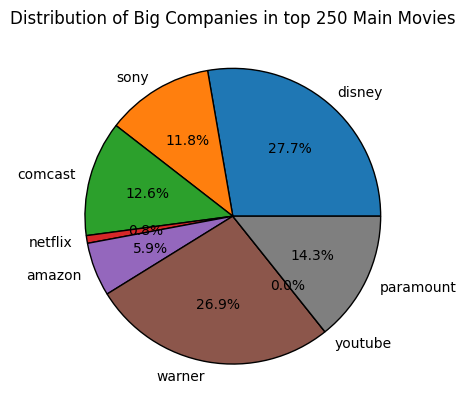

In [361]:
# Get the labels and values for the pie chart
labels = []
values = []
for key, value in reimported_production_companies.items():
    if isinstance(value, dict) and 'total' in value:
        labels.append(key)
        values.append(value['total'])

# Create the pie chart
plt.pie(values, labels=labels, wedgeprops={"edgecolor":"k", "linewidth":1}, autopct='%1.1f%%')

# Add a title
plt.title('Distribution of Big Companies in top 250 Main Movies')

# Show the plot
plt.show()

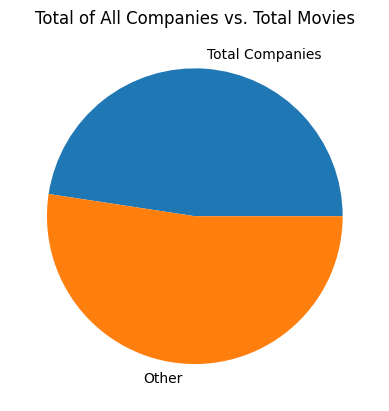

In [366]:
# Calculate the total of all companies
total_companies = sum(value['total'] for key, value in my_dict.items() if isinstance(value, dict) and 'total' in value)

# Set the labels and values for the pie chart
labels = ['Total Companies', 'Other']
values = [total_companies, my_dict['movie_count'] - total_companies]

# Create the pie chart
plt.pie(values, labels=labels)

# Add a title
plt.title('Total of All Companies vs. Total Movies')

# Show the plot
plt.show()


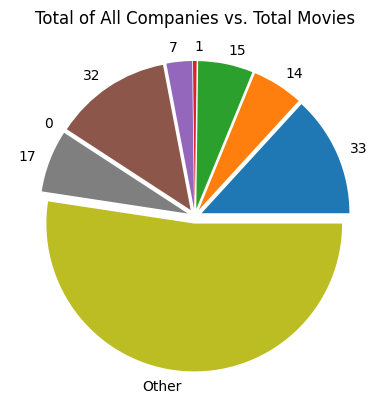

In [372]:

# Calculate the total of all companies
total_companies = sum(value['total'] for key, value in my_dict.items() if isinstance(value, dict) and 'total' in value)

# Set the labels and values for the pie chart
labels = []
values = []
for key, value in my_dict.items():
    if isinstance(value, dict) and 'total' in value:
        labels.append(value['total'])
        values.append(value['total'])
labels.append('Other')
values.append(my_dict['movie_count'] - total_companies)

# Create the pie chart
plt.pie(values, labels=labels, explode=[0.05] * len(labels))

# Add a title
plt.title('Total of All Companies vs. Total Movies')

# Show the plot
plt.show()

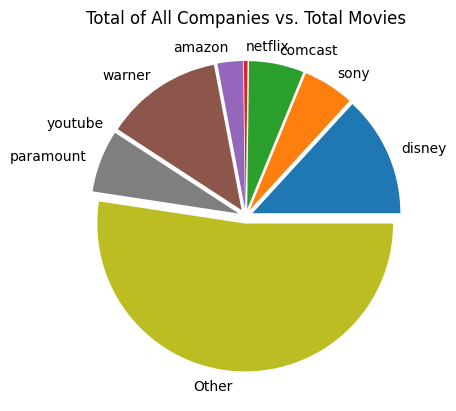

In [380]:
# Calculate the total of all companies
total_companies = sum(value['total'] for key, value in my_dict.items() if isinstance(value, dict) and 'total' in value)

# Set the labels and values for the pie chart
labels = []
values = []
for key, value in my_dict.items():
    if isinstance(value, dict) and 'total' in value:
        labels.append(key)
        values.append(value['total'])
labels.append('Other')
values.append(my_dict['movie_count'] - total_companies)

# Create the pie chart
plt.pie(values, labels=labels, explode=[0.05] * len(labels))

# Add a title
plt.title('Total of All Companies vs. Total Movies')

# Show the plot
plt.show()

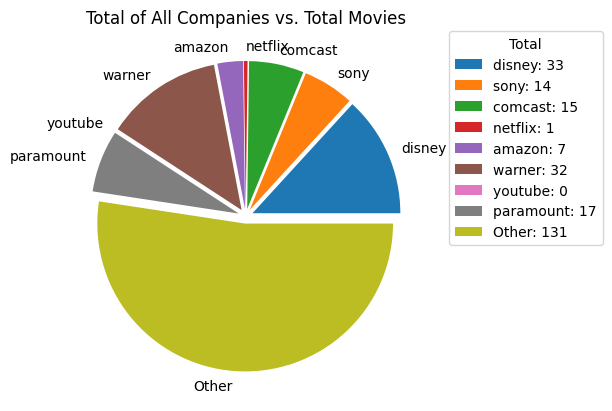

In [387]:
# Calculate the total of all companies
total_companies = sum(value['total'] for key, value in my_dict.items() if isinstance(value, dict) and 'total' in value)

# Set the labels and values for the pie chart
labels = []
values = []
for key, value in my_dict.items():
    if isinstance(value, dict) and 'total' in value:
        labels.append(key)
        values.append(value['total'])
labels.append('Other')
values.append(my_dict['movie_count'] - total_companies)

# Create the pie chart
plt.pie(values, labels=labels, explode=[0.05] * len(labels))

# Add a title
plt.title('Total of All Companies vs. Total Movies')

# Add the total numbers to the legend
plt.legend(title='Total', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., labels=['{}: {}'.format(label, value) for label, value in zip(labels, values)])

# Show the plot
plt.show()

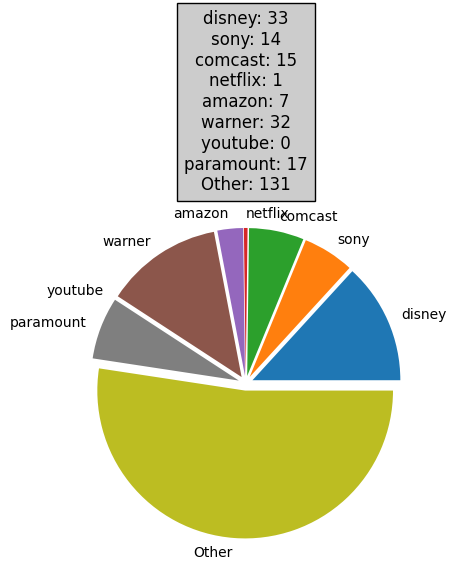

In [382]:
# Calculate the total of all companies
total_companies = sum(value['total'] for key, value in my_dict.items() if isinstance(value, dict) and 'total' in value)

# Set the labels and values for the pie chart
labels = []
values = []
for key, value in my_dict.items():
    if isinstance(value, dict) and 'total' in value:
        labels.append(key)
        values.append(value['total'])
labels.append('Other')
values.append(my_dict['movie_count'] - total_companies)

# Create the pie chart
plt.pie(values, labels=labels, explode=[0.05] * len(labels))

# Add a title
plt.title('Total of All Companies vs. Total Movies')

# Add the total numbers to the center of the pie chart
plt.title('\n'.join(['{}: {}'.format(label, value) for label, value in zip(labels, values)]), bbox={'facecolor':'0.8', 'pad':5})

# Show the plot
plt.show()

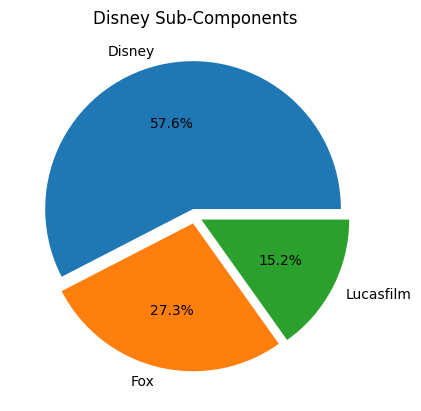

In [389]:
# Get the data for the "disney" company
disney_data = my_dict['disney']
labels = []
values = []
for key, value in disney_data.items():
    if key != 'total':
        labels.append(key)
        values.append(value)

# Create the pie chart with subplots
fig, ax = plt.subplots()
ax.pie(values, labels=labels, autopct='%1.1f%%', explode=[0.05] * len(labels))

# Add a title
plt.title('Disney Sub-Components')

# Show the plot
plt.show()